Probabilistic clustering with Gaussian Mixture Models
=======================================================
In KMeans, we assume that the variance of the clusters is equal. This leads to a subdivi-
sion of space that determines how the clusters are assigned; but, what about a situation
where the variances are not equal and each cluster point has some probabilistic associa-
tion with it?
#### Getting ready
There's a more probabilistic way of looking at KMeans clustering. Hard KMeans clus-
tering is the same as applying a Gaussian Mixture Model with a covariance matrix, S,
which can be factored to the error times of the identity matrix. This is the same covari-
ance structure for each cluster. It leads to spherical clusters. However, if we allow S to
vary, a GMM can be estimated and used for prediction. We'll look at how this works in
a univariate sense, and then expand to more dimensions.
#### Implementation
First, we need to create some data. For example, let's simulate heights of both women
and men. We'll use this example throughout this recipe. It's a simple example, but
hopefully, will illustrate what we're trying to accomplish in an N dimensional space,
which is a little easier to visualize:

In [2]:
import numpy as np
N = 1000
in_m = 72
in_w = 66
s_m = 2
s_w = s_m
m = np.random.normal(in_m, s_m, N)
w = np.random.normal(in_w, s_w, N)

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


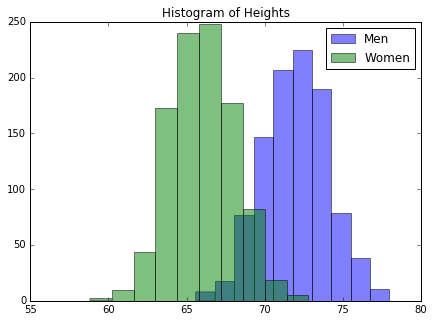

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Histogram of Heights")
ax.hist(m, alpha=.5, label="Men");
ax.hist(w, alpha=.5, label="Women");
ax.legend()

The following is the output: Next, we might be interested in subsampling the group,
fitting the distribution, and then predicting the remaining groups:


In [4]:
random_sample = np.random.choice([True, False], size=m.size)
m_test = m[random_sample]
m_train = m[~random_sample]
w_test = w[random_sample]
w_train = w[~random_sample]

Now we need to get the empirical distribution of the heights of both men and women
based on the training set:


In [9]:
from scipy import stats
m_pdf = stats.norm(m_train.mean(), m_train.std())
w_pdf = stats.norm(w_train.mean(), w_train.std())


For the test set, we will calculate based on the likelihood that the data point was gen-
erated from either distribution, and the most likely distribution will get the appropriate
label assigned. We will, of course, look at how accurate we were:


In [10]:
print( m_pdf.pdf(m[0]) )
print( w_pdf.pdf(m[0]) )


0.143355432914
0.0169482868237


Notice the difference in likelihoods. Assume that we guess situations when the men's
probability is higher, but we overwrite them if the women's probability is higher:


In [11]:
guesses_m = np.ones_like(m_test)
guesses_m[m_pdf.pdf(m_test) < w_pdf.pdf(m_test)] = 0


Obviously, the question is how accurate we are. Since guesses m will be 1 if we are
correct, and 0 if we aren't, we take the mean of the vector and get the accuracy:


In [12]:
guesses_m.mean()


0.92706333973128596


Not too bad! Now, to see how well we did with for the women's group, use the
following commands:


In [13]:
guesses_w = np.ones_like(w_test)
guesses_w[m_pdf.pdf(w_test) > w_pdf.pdf(w_test)] = 0
guesses_w.mean()

0.91554702495201534

Let's allow the variance to dier between groups. First, create some new data:


In [14]:
s_m = 1
s_w = 4
m = np.random.normal(in_m, s_m, N)
w = np.random.normal(in_w, s_w, N)


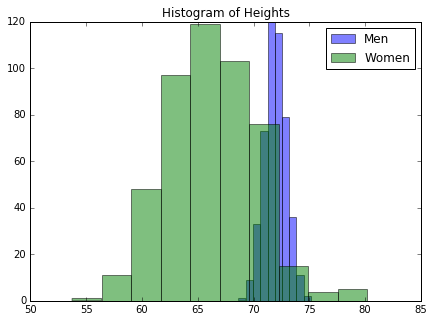

In [15]:
#Then, create a training set:
m_test = m[random_sample]
m_train = m[~random_sample]
w_test = w[random_sample]
w_train = w[~random_sample]
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Histogram of Heights")
ax.hist(m_train, alpha=.5, label="Men");
ax.hist(w_train, alpha=.5, label="Women");
ax.legend()

Let's take a look at the difference in variances between the men and women: His-
togram of Heights Chapter 3 109 Now we can create the same PDFs:


In [16]:
m_pdf = stats.norm(m_train.mean(), m_train.std())
w_pdf = stats.norm(w_train.mean(), w_train.std())


The following is the output: You can imagine this in a multidimensional space:


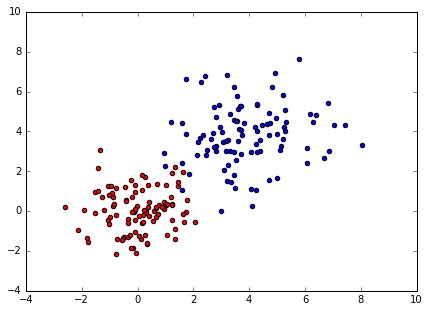

In [17]:
class_A = np.random.normal(0, 1, size=(100, 2))
class_B = np.random.normal(4, 1.5, size=(100, 2))
f, ax = plt.subplots(figsize=(7, 5))
ax.scatter(class_A[:,0], class_A[:,1], label='A', c='r')
ax.scatter(class_B[:,0], class_B[:,1], label='B')


The following is the output:
How it works... Okay, so now that we've looked at how we can classify points based
on distribution, let's look at how we can do this in scikit-learn:


In [ ]:
from sklearn.mixture import GMM
gmm = GMM(n_components=2)
X = np.row_stack((class_A, class_B))
y = np.hstack((np.ones(100), np.zeros(100)))

In [18]:

# We'll create a training set:
train = np.random.choice([True, False], 200)
gmm.fit(X[train])


/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/u

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)

Fitting and predicting is done in the same way as tting is done for many of the
other objects in scikit-learn:


In [19]:
gmm.fit(X[train])
gmm.predict(X[train])[:5]



/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/nbuser/anaconda3_410/lib/python3

array([0, 0, 0, 0, 0])

There are other methods worth looking at now that the model has been t. For
example, using score samples, we can actually get the per-sample likelihood for each
label.
